Graph Generation

In [19]:
# Imports and Initializations
import pandas as pd
import numpy as np 
import scienceplots
import matplotlib.pyplot as plt 
def science_plot(fontsize = 12):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

paw_file = 'foot_lengths.csv'
rotarod_hotplate_file = 'rotarod_hotplate.csv'

# sfi_stats loading
paw_data = pd.read_csv(paw_file)
rotarod_hotplate_data = pd.read_csv(rotarod_hotplate_file)

In [20]:
# SFI calculation function
def calculate_sfi(epl, npl, ets, nts, eit, nit):
    """
    Calculate the Sciatic Functional Index (SFI).

    Parameters:
    epl (float): Experimental paw length (heel to third toe) for the right paw.
    npl (float): Normal paw length for the left paw.
    ets (float): Experimental toe spread (distance between first and fifth toes) for the right paw.
    nts (float): Normal toe spread for the left paw.
    eit (float): Experimental inter-median toe spread (distance between second and fourth toes) for the right paw.
    nit (float): Normal inter-median toe spread for the left paw.

    Returns:
    float: The calculated SFI value.
    """
    sfi = (-38.3 * ((epl - npl) / npl) +
           109.5 * ((ets - nts) / nts) +
            13.3 * ((eit - nit) / nit) -
           8.839)
    
    return sfi

In [21]:
# Data grouping
paw_data['SFI'] = paw_data.apply(
    lambda row: calculate_sfi(
        row['EPL'], row['NPL'], row['ETS'], row['NTS'], row['EIT'], row['NIT']
    ), axis=1
)

sfi_stats = paw_data.groupby('GENERAL CODE')['SFI'].agg(['mean','std']).reset_index()
sfi_stats.rename(columns={'mean': 'Average SFI', 'std': 'SFI Standard Deviation'}, inplace=True)

rotarod_data = rotarod_hotplate_data[['GENERAL CODE', 'R', 'T', 'D']]
hotplate_data = rotarod_hotplate_data[['GENERAL CODE', 'H']]
print(rotarod_data)
print(hotplate_data)

rotarod_stats_R = rotarod_data.groupby('GENERAL CODE')['R'].agg(['mean','std']).reset_index()
rotarod_stats_T = rotarod_data.groupby('GENERAL CODE')['T'].agg(['mean','std']).reset_index()
rotarod_stats_D = rotarod_data.groupby('GENERAL CODE')['D'].agg(['mean','std']).reset_index()
hotplate_stats  = hotplate_data.groupby('GENERAL CODE')['H'].agg(['mean','std']).reset_index()


    GENERAL CODE      R   T     D
0             CB  37.44  19  0.59
1             CB  36.99  18  0.56
2             CB  37.36  19  0.57
3             CB  33.94  17  0.47
4             CB  33.07  16  0.46
..           ...    ...  ..   ...
415          SW6  40.18  30  1.04
416          SW6  38.57  28  0.97
417          SW6  40.18  27  0.93
418          SW6  40.18  35  1.21
419          SW6  40.18  27  0.93

[420 rows x 4 columns]
    GENERAL CODE      H
0             CB  17.89
1             CB  17.62
2             CB  11.41
3             CB  16.00
4             CB  18.80
..           ...    ...
415          SW6   9.66
416          SW6  10.62
417          SW6  12.93
418          SW6  13.67
419          SW6  14.06

[420 rows x 2 columns]


   GENERAL CODE  Average SFI  SFI Standard Deviation
0            CB   -12.796314               16.657336
1           CW1    -4.013793               11.859811
2           CW2   -14.105318               12.473695
3           CW3    -5.958505               13.306974
4           CW4    -5.935891               19.124204
5           CW5    -4.182030               16.877843
6           CW6     0.850840               20.589812
7            NB    -0.618671               17.283106
8           NW1   -37.535890               42.538615
9           NW2   -16.473342               26.021377
10          NW3    -6.301292               16.052359
11          NW4    -9.421528               13.747624
12          NW5   -14.744889               15.497752
13          NW6    -8.566096               15.734008
14           PB    11.808781               28.798788
15          PW1   -23.574745               22.810847
16          PW2   -25.147253               30.418431
17          PW3    -7.402888               24.

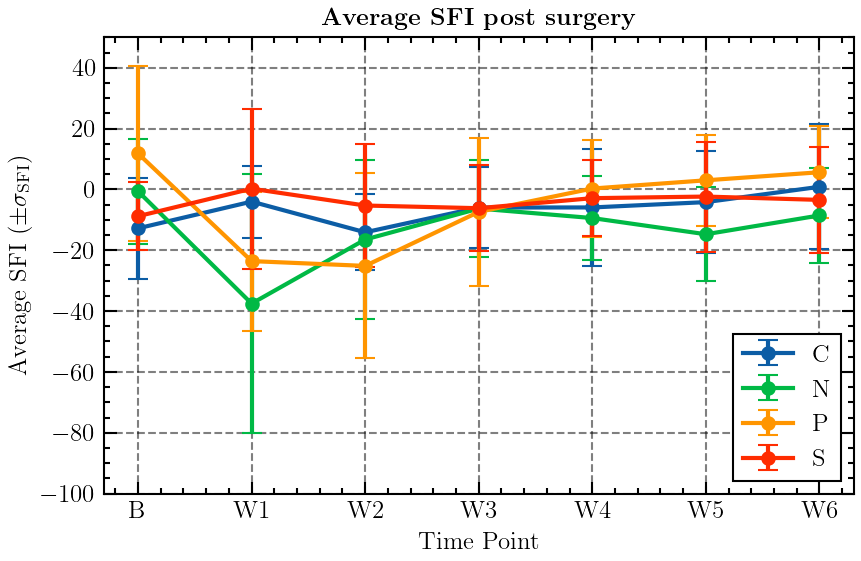

In [22]:
# SFI Plot
print(sfi_stats)
# Extract the letter code (Category) and time point (Week)
sfi_stats['Category'] = sfi_stats['GENERAL CODE'].str[0]  # Extract the first letter
sfi_stats['Week'] = sfi_stats['GENERAL CODE'].str[1:]    # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3' : 3, 'W4': 4, 'W5': 5, 'W6':6}
sfi_stats['Week_Order'] = sfi_stats['Week'].map(week_order)

# Sort by Category and Week_Order
sfi_stats.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Group by Category and Week for plotting
grouped = sfi_stats.groupby(['Category', 'Week']).agg(
    avg_sfi=('Average SFI', 'mean'),
    std_sfi=('SFI Standard Deviation', 'mean')
).reset_index()

# Plotting
plt.figure(figsize=(6,4), dpi = 150)

categories = grouped['Category'].unique()
weeks = ['B', 'W1', 'W2','W3','W4','W5','W6']

for category in categories:
    subset = grouped[grouped['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['avg_sfi'], yerr=subset['std_sfi'], 
        label=f'{category}', fmt='-o', capsize=5
    )

# Customize the plot
plt.title(r'\textbf{Average SFI post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Average SFI ($\pm \sigma_\text{SFI}$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=weeks)   # Ensure x-axis is labeled B, W1, W2
plt.ylim(-100,50)
plt.grid(True)
plt.legend(fancybox=False, edgecolor = 'k')
plt.tight_layout()

# Show the plot
plt.show()

   GENERAL CODE       mean       std
0            CB  33.248000  4.191158
1           CW1  38.910667  2.941728
2           CW2  39.630000  2.130141
3           CW3  39.816667  1.192307
4           CW4  40.180000  0.000000
5           CW5  38.385333  4.047599
6           CW6  39.808000  1.440750
7            NB  34.212667  7.023154
8           NW1  33.854000  7.800993
9           NW2  34.894667  6.052175
10          NW3  36.739333  4.763514
11          NW4  38.676667  4.154274
12          NW5  39.598667  1.625093
13          NW6  39.508667  0.926182
14           PB  33.222667  6.636066
15          PW1  26.782667  8.871146
16          PW2  35.976667  7.478673
17          PW3  37.356000  6.689358
18          PW4  37.694000  5.282872
19          PW5  37.818000  4.179465
20          PW6  38.204000  1.625787
21           SB  33.852667  6.711027
22          SW1  36.512667  5.616010
23          SW2  37.155333  6.401733
24          SW3  37.539333  5.750432
25          SW4  40.180000  0.000000
2

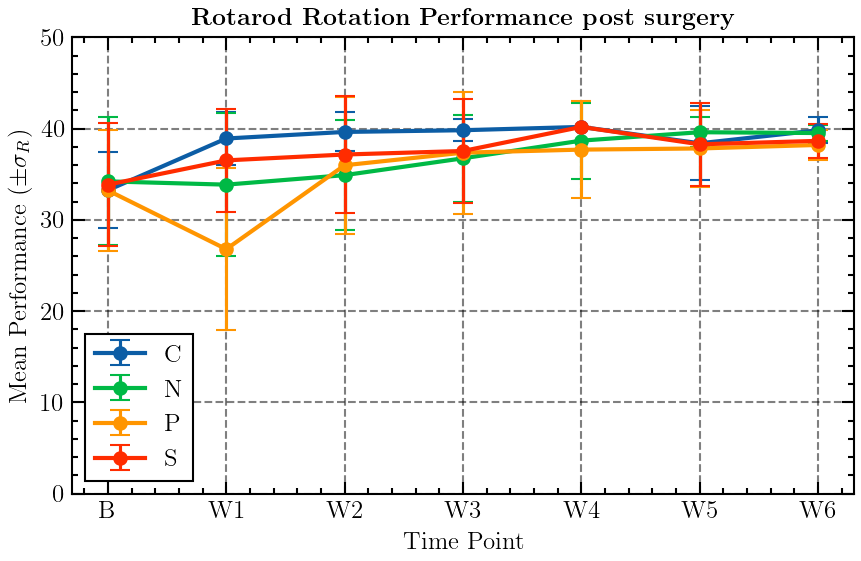

In [23]:
# Rotarod R Plot
print(rotarod_stats_R)
# Extract the letter code (Category) and time point (Week)
rotarod_stats_R['Category'] = rotarod_stats_R['GENERAL CODE'].str[0]  # Extract the first letter
rotarod_stats_R['Week'] = rotarod_stats_R['GENERAL CODE'].str[1:]     # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3': 3, 'W4':4, 'W5':5, 'W6':6}
rotarod_stats_R['Week_Order'] = rotarod_stats_R['Week'].map(week_order)

# Sort by Category and Week_Order
rotarod_stats_R.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Plotting
plt.figure(figsize=(6, 4), dpi=150)

categories = rotarod_stats_R['Category'].unique()
weeks = ['B', 'W1', 'W2','W3', 'W4', 'W5', 'W6']   # Predefined week labels

for category in categories:
    subset = rotarod_stats_R[rotarod_stats_R['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['mean'], yerr=subset['std'],  # Use 'mean' and 'std' columns
        label=f'{category}', fmt='-o', capsize=5, elinewidth=1.5
    )

# Customize the plot
plt.title(r'\textbf{Rotarod Rotation Performance post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Mean Performance ($\pm \sigma_R$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=weeks)  # Map x-ticks to week labels
plt.ylim(0,50)
plt.grid(True)
plt.legend(fancybox=False, edgecolor='k', loc = 'lower left')
plt.tight_layout()

# Show the plot
plt.show()

   GENERAL CODE       mean        std Category Week  Week_Order
0            CB  16.466667   2.199567        C    B           0
1           CW1  20.533333   2.503331        C   W1           1
2           CW2  23.266667   2.491892        C   W2           2
3           CW3  24.266667   3.634491        C   W3           3
4           CW4  27.533333   4.673125        C   W4           4
5           CW5  32.000000  12.029725        C   W5           5
6           CW6  38.133333   6.300416        C   W6           6
7            NB  18.133333   4.778922        N    B           0
8           NW1  19.000000   6.469710        N   W1           1
9           NW2  24.000000  16.124515        N   W2           2
10          NW3  25.200000  13.523524        N   W3           3
11          NW4  26.466667  10.154989        N   W4           4
12          NW5  25.800000   5.671986        N   W5           5
13          NW6  26.866667   6.534159        N   W6           6
14           PB  17.066667   4.096456   

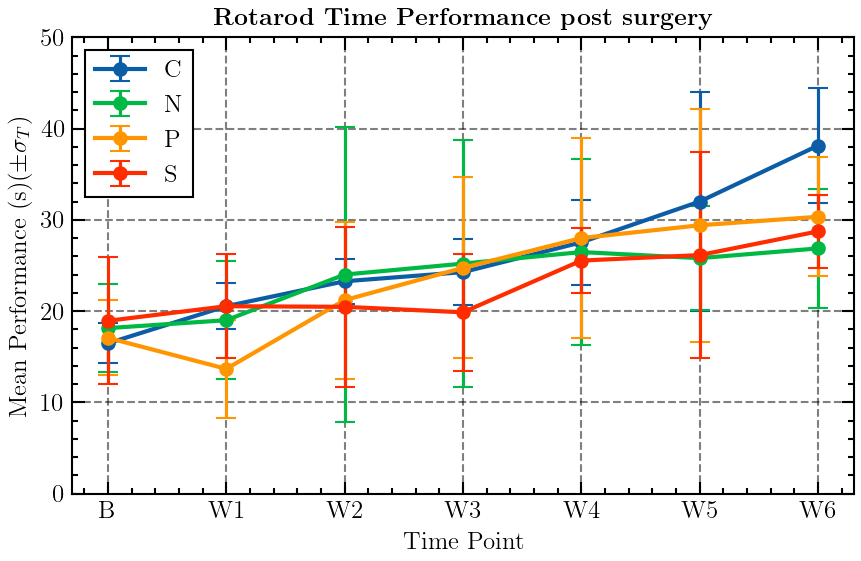

In [24]:
# Rotarod T Plot
# Extract the letter code (Category) and time point (Week)
rotarod_stats_T['Category'] = rotarod_stats_T['GENERAL CODE'].str[0]  # Extract the first letter
rotarod_stats_T['Week'] = rotarod_stats_T['GENERAL CODE'].str[1:]     # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3': 3, 'W4':4, 'W5':5, 'W6': 6}
rotarod_stats_T['Week_Order'] = rotarod_stats_T['Week'].map(week_order)

# Sort by Category and Week_Order
rotarod_stats_T.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Plotting
plt.figure(figsize=(6, 4), dpi=150)

categories = rotarod_stats_T['Category'].unique()
weeks = ['B', 'W1', 'W2','W3', 'W4', 'W5', 'W6']   # Predefined week labels

for category in categories:
    subset = rotarod_stats_T[rotarod_stats_T['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['mean'], yerr=subset['std'],  # Use 'mean' and 'std' columns
        label=f'{category}', fmt='-o', capsize=5, elinewidth=1.5
    )
print(rotarod_stats_T)
# Customize the plot
plt.title(r'\textbf{Rotarod Time Performance post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Mean Performance (s)($\pm \sigma_T$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=weeks)  # Map x-ticks to week labels
plt.ylim(0,50)
plt.grid(True)
plt.legend(fancybox=False, edgecolor='k', loc = 'upper left')
plt.tight_layout()

# Show the plot
plt.show()

   GENERAL CODE      mean       std Category Week  Week_Order
0            CB  0.462667  0.107469        C    B           0
1           CW1  0.740000  0.187579        C   W1           1
2           CW2  0.879333  0.157592        C   W2           2
3           CW3  0.941333  0.243424        C   W3           3
4           CW4  1.156667  0.308445        C   W4           4
5           CW5  1.450667  0.775863        C   W5           5
6           CW6  1.517333  0.417962        C   W6           6
7            NB  0.576000  0.274013        N    B           0
8           NW1  0.637333  0.367996        N   W1           1
9           NW2  0.941333  1.025802        N   W2           2
10          NW3  1.006667  0.866138        N   W3           3
11          NW4  1.100000  0.655112        N   W4           4
12          NW5  1.043333  0.372878        N   W5           5
13          NW6  1.122000  0.389399        N   W6           6
14           PB  0.506667  0.219111        P    B           0
15      

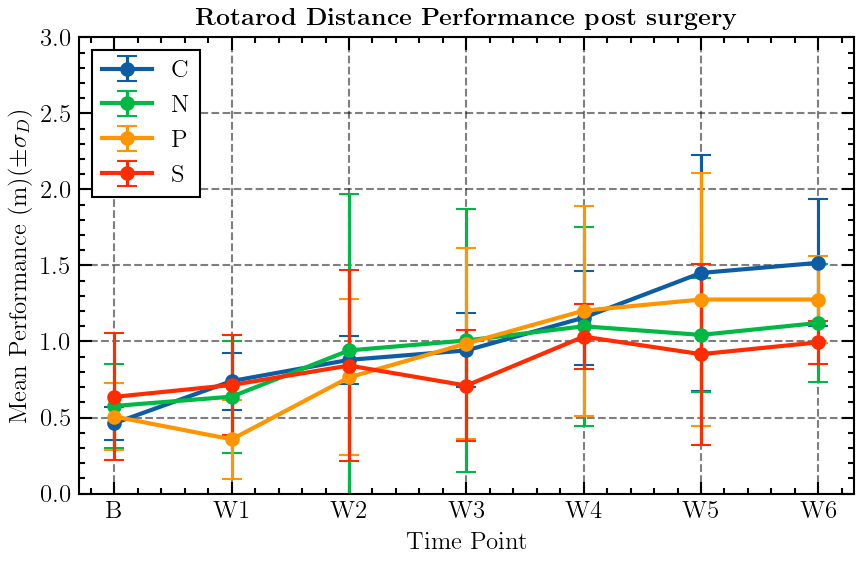

In [25]:
# Rotarod D Plot
# Extract the letter code (Category) and time point (Week)
rotarod_stats_D['Category'] = rotarod_stats_D['GENERAL CODE'].str[0]  # Extract the first letter
rotarod_stats_D['Week'] = rotarod_stats_D['GENERAL CODE'].str[1:]     # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3': 3, 'W4': 4, 'W5':5, 'W6': 6}
rotarod_stats_D['Week_Order'] = rotarod_stats_D['Week'].map(week_order)

# Sort by Category and Week_Order
rotarod_stats_D.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Plotting
plt.figure(figsize=(6, 4), dpi = 150)

categories = rotarod_stats_D['Category'].unique()
weeks = ['B', 'W1', 'W2','W3', 'W4', 'W5', 'W6']   # Predefined week labels

for category in categories:
    subset = rotarod_stats_D[rotarod_stats_D['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['mean'], yerr=subset['std'],  # Use 'mean' and 'std' columns
        label=f'{category}', fmt='-o', capsize=5, elinewidth=1.5
    )
print(rotarod_stats_D)
# Customize the plot
plt.title(r'\textbf{Rotarod Distance Performance post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Mean Performance (m)($\pm \sigma_D$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=weeks)  # Map x-ticks to week labels
plt.ylim(0,3)
plt.grid(True)
plt.legend(fancybox=False, edgecolor='k', loc = 'upper left')
plt.tight_layout()

# Show the plot
plt.show()

   GENERAL CODE       mean       std Category Week  Week_Order
0            CB  13.388000  3.319183        C    B           0
1           CW1  10.815333  4.429916        C   W1           1
2           CW2  12.362667  2.166394        C   W2           2
3           CW3  11.424000  2.241434        C   W3           3
4           CW4  11.042000  1.035596        C   W4           4
5           CW5  10.858000  0.979608        C   W5           5
6           CW6  10.674667  1.411022        C   W6           6
7            NB  14.238667  6.259143        N    B           0
8           NW1  15.371333  5.425242        N   W1           1
9           NW2  18.324000  4.298406        N   W2           2
10          NW3  15.565333  4.877329        N   W3           3
11          NW4  13.255333  0.974840        N   W4           4
12          NW5  14.584000  2.491525        N   W5           5
13          NW6  13.729333  3.845696        N   W6           6
14           PB  16.608667  7.708178        P    B     

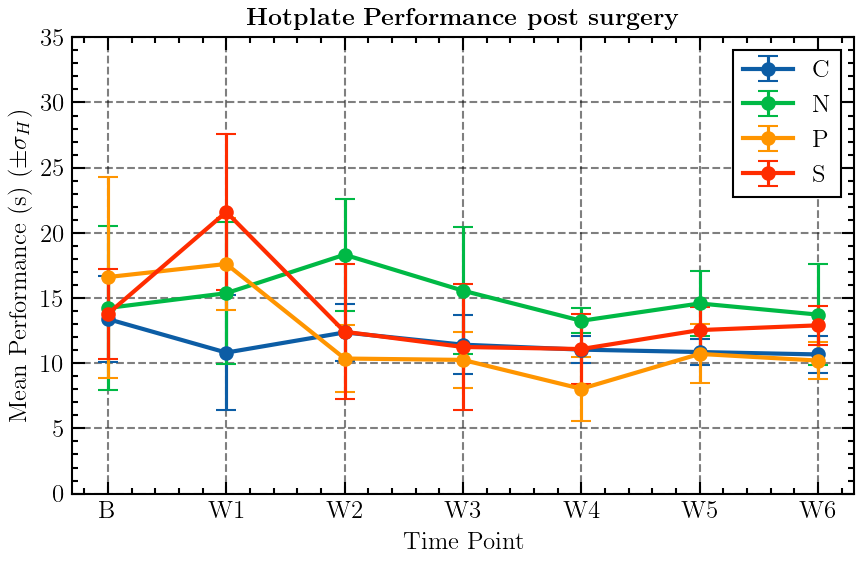

In [26]:
# Hotplate Plot
# Extract the letter code (Category) and time point (Week)
hotplate_stats['Category'] = hotplate_stats['GENERAL CODE'].str[0]  # Extract the first letter
hotplate_stats['Week'] = hotplate_stats['GENERAL CODE'].str[1:]     # Extract everything after the first letter

# Map weeks to maintain the desired order on the x-axis
week_order = {'B': 0, 'W1': 1, 'W2': 2, 'W3': 3, 'W4': 4, 'W5':5, 'W6': 6}
hotplate_stats['Week_Order'] = hotplate_stats['Week'].map(week_order)

# Sort by Category and Week_Order
hotplate_stats.sort_values(by=['Category', 'Week_Order'], inplace=True)

# Plotting
plt.figure(figsize=(6, 4), dpi = 150)

categories = hotplate_stats['Category'].unique()
weeks = ['B', 'W1', 'W2','W3', 'W4', 'W5', 'W6']  # Predefined week labels

for category in categories:
    subset = hotplate_stats[hotplate_stats['Category'] == category]
    plt.errorbar(
        subset['Week'], subset['mean'], yerr=subset['std'],  # Use 'mean' and 'std' columns
        label=f'{category}', fmt='-o', capsize=5, elinewidth=1.5
    )
print(hotplate_stats)
# Customize the plot
plt.title(r'\textbf{Hotplate Performance post surgery}')
plt.xlabel('Time Point')
plt.ylabel(r'Mean Performance (s) ($\pm \sigma_H$)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=weeks)  # Map x-ticks to week labels
plt.ylim(0,35)
plt.grid(True)
plt.legend(fancybox=False, edgecolor='k', loc = 'upper right')
plt.tight_layout()

# Show the plot
plt.show()